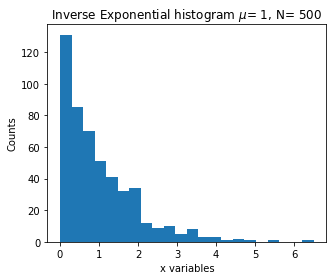

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import expon
from scipy.special import factorial
from tabulate import tabulate

def Inverse_exponential(mu, n_size):
    y = []
    for _ in range(n_size):
        x = -mu*np.log(np.random.uniform(0,1))
        y.append(x)
    return y

# Question 1 (a)
mu1=1
n_size=500;
plt.figure(figsize=(5,4))
plt.hist(Inverse_exponential(mu1, n_size),bins='auto')
plt.xlabel('x variables')
plt.ylabel('Counts')
plt.title(r'Inverse Exponential histogram $\mu$= %i, N= %i'%(mu1,n_size))
plt.show()



In [4]:
def optimal_parameter(alpha,beta):
    mu = beta/alpha

    sup_x = (alpha -1)/(beta-mu)
    M = beta**alpha / factorial(alpha-1) /mu *(sup_x)**(alpha-1) * np.exp(1-alpha)
    return mu, M

def func(x,M,alpha,beta,mu):
    ans = gamma.pdf(x, a=alpha, scale=1/beta)/(M*expon.pdf(x, scale=1/mu))
    return ans

data ={'alpha':[],'lambda':[],'mu':[],'M':[],'Acceptance prob':[]}

alpha_beta_pair =[[1.00001,1], [1.2,1],
                  [1.5,1],       [2,1],
                  [2,2]  ,       [3,2],  
                  [4,3]  ,       [5,3]]


N_size =1000;
for pair in alpha_beta_pair:
    alpha, beta  = pair[0] ,pair[1]
    saved_data=[]
    for _ in range(N_size):
        mu, M = optimal_parameter(alpha,beta)
        y = np.random.exponential(1/mu)
        u = np.random.uniform(0,1)

        if u< func(y,M,alpha,beta,mu): saved_data.append(y)

    p = len(saved_data)/N_size
    data['alpha'].append(alpha)
    data['lambda'].append(beta)
    data['mu'].append(mu)
    data['M'].append(M)
    data['Acceptance prob'].append(p)

print('=======Question1 (b)=======')
print()
print('N size = ',N_size)
print()
print(tabulate(data, headers='keys'))




=======Question1 (b)=======

N size =  1000

  alpha    lambda        mu        M    Acceptance prob
-------  --------  --------  -------  -----------------
1.00001         1  0.99999   1.00001              1
1.2             1  0.833333  1.10978              0.897
1.5             1  0.666667  1.25732              0.792
2               1  0.5       1.47152              0.691
2               2  1         1.47152              0.659
3               2  0.666667  1.82703              0.573
4               3  0.75      2.12425              0.446
5               3  0.6       2.38485              0.436


In [9]:
def g_sample_generator(N_size,alpha,beta):
    
    saved_data=[]
    n_samples = 0
    while len(saved_data) <= N_size:
    # for _ in range(N_size):
        mu, M = optimal_parameter(alpha,beta)
        y = np.random.exponential(mu)
        u = np.random.uniform(0,1)
        n_samples +=1
        if u< func(y,M,alpha,beta,mu): 
            saved_data.append(y)
    p = len(saved_data)/n_samples
    return saved_data 




In [10]:
n_size = 1000
alpha = 5
lamda = 3
x_random_variable = g_sample_generator(n_size,alpha,lamda)

MC=[]
x_store=[]
for x in x_random_variable:
    if x>1 and x<5: 
        x_store.append(x)
        MC.append(np.log(1+x**2)/((3**5)/factorial(4)))

zscore =1.96
theta = np.mean(MC)
SE = np.sqrt(np.var(MC))/np.sqrt(n_size)
theta = np.mean(MC)
theta = np.mean(MC)
lower_b = theta - zscore*SE
upper_b = theta + zscore*SE
CI_95 = [lower_b,upper_b]
print('=============== Question1 (c)======================')
print('Sample size = ', n_size)
print('theta = ' ,theta, 'Standard Error = ', SE)
print('95% CI = ',CI_95)


=============== Question1 (c)======================
Sample size =  1000
theta =  0.11807600395722277 Standard Error =  0.0012576419797487351
95% CI =  [0.11561102567691525, 0.12054098223753029]
